In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Data Preparation

## Cleaning Data

In [2]:
from api_helpers.team_stats_helpers import load_dataframe
import pandas as pd

# load data
from api_helpers.team_stats_helpers import load_dataframe

nba_dataframe = load_dataframe(["PTS","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST"])
nba_dataframe = nba_dataframe.drop(nba_dataframe[nba_dataframe["FGA"] == 0].index)
nba_dataframe = nba_dataframe.reset_index(drop=True)

# label encoding
nba_dataframe["NBA_FINALS_APPEARANCE"].fillna(0.0, inplace=True)
nba_dataframe["NBA_FINALS_APPEARANCE"].replace("FINALS APPEARANCE", 0, inplace=True)
nba_dataframe["NBA_FINALS_APPEARANCE"].replace("LEAGUE CHAMPION", 1, inplace=True)

# le = pre.LabelEncoder()
# nba_dataframe["NBA_FINALS_APPEARANCE"] = le.fit_transform(nba_dataframe["TEAM_ID"])
nba_dataframe


/tmp/ipykernel_180620/1467745713.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba_dataframe["NBA_FINALS_APPEARANCE"].fillna(0.0, inplace=True)
/tmp/ipykernel_180620/1467745713.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nba_dataframe["NBA_FINALS_APPEARANCE"].replace("LEAGUE CHAMPION

,TEAM_ID,YEAR,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PTS
0,1610612737,1982-83,0.0,3352,7146,0.469,45,188,0.239,1586,2111,0.751,1139,2433,3572,1945,8335
1,1610612737,1983-84,0.0,3230,6809,0.474,23,106,0.217,1838,2414,0.761,1112,2232,3344,1827,8321
2,1610612737,1984-85,0.0,3444,7119,0.484,73,235,0.311,1782,2371,0.752,1161,2345,3506,2009,8743
3,1610612737,1985-86,0.0,3447,7029,0.490,33,166,0.199,1979,2704,0.732,1249,2405,3654,2025,8906
4,1610612737,1986-87,0.0,3435,7141,0.481,135,425,0.318,2019,2661,0.759,1350,2478,3828,2077,9024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1610612766,2019-20,0.0,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,6687
1182,1610612766,2020-21,0.0,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,7881
1183,1610612766,2021-22,0.0,3508,7497,0.468,1143,3130,0.365,1298,1753,0.740,888,2767,3655,2302,9457
1184,1610612766,2022-23,0.0,3385,7413,0.457,881,2669,0.330,1447,1933,0.749,901,2751,3652,2062,9098


      NBA_FINALS_APPEARANCE   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM  \
0                       0.0  3352  7146   0.469    45   188    0.239  1586   
1                       0.0  3230  6809   0.474    23   106    0.217  1838   
2                       0.0  3444  7119   0.484    73   235    0.311  1782   
3                       0.0  3447  7029   0.490    33   166    0.199  1979   
4                       0.0  3435  7141   0.481   135   425    0.318  2019   
...                     ...   ...   ...     ...   ...   ...      ...   ...   
1181                    0.0  2425  5586   0.434   785  2231    0.352  1052   
1182                    0.0  2875  6324   0.455   985  2666    0.369  1146   
1183                    0.0  3508  7497   0.468  1143  3130    0.365  1298   
1184                    0.0  3385  7413   0.457   881  2669    0.330  1447   
1185                    0.0  3281  7133   0.460   989  2788    0.355  1189   

       FTA  FT_PCT  OREB  DREB   REB   AST   PTS  
0     2111  

<AxesSubplot:>

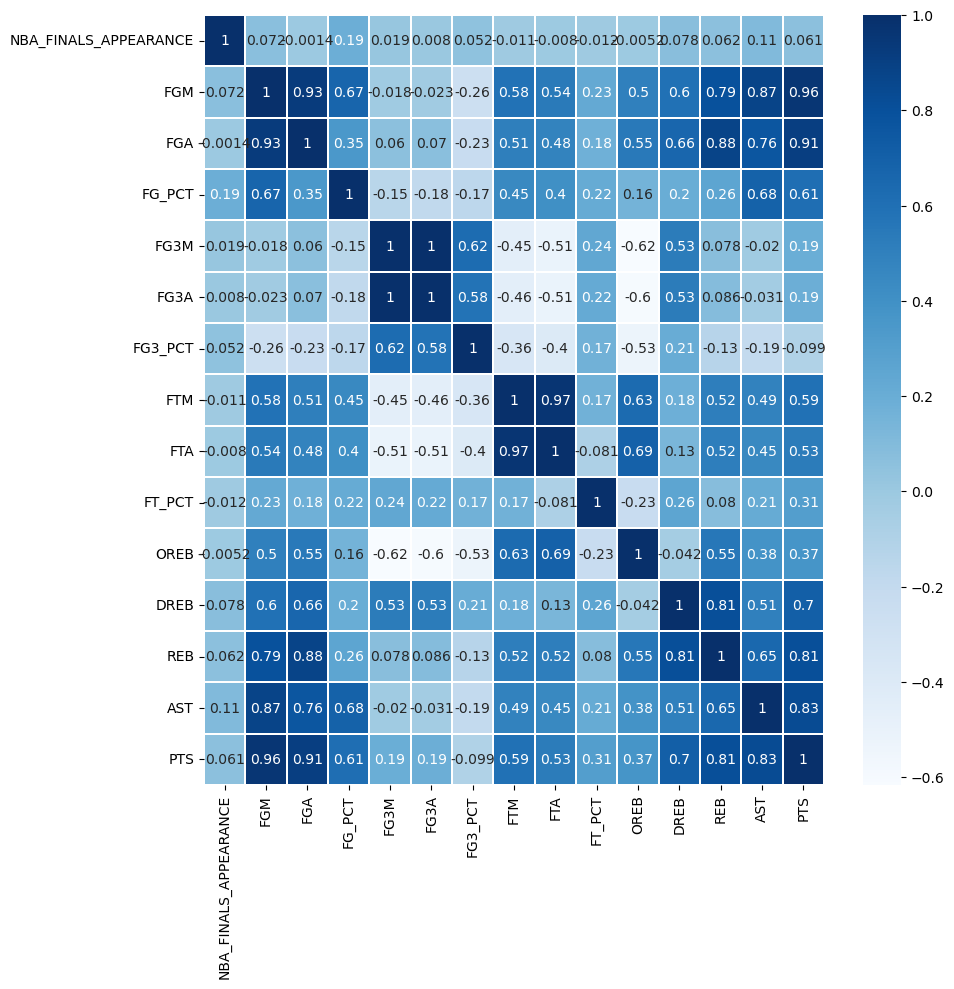

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
team_data = nba_dataframe.drop(['TEAM_ID', 'YEAR'], axis=1)
team_result = team_data['NBA_FINALS_APPEARANCE']
print(team_data)

corr = nba_dataframe.drop(['TEAM_ID', 'YEAR'], axis=1).corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(10, 10))

#create heatmap
sns.heatmap(corr, cmap="Blues",annot=True,linewidths=.3)

In [4]:
# drop features with small correlation to finals appearance
correlated_features = corr['NBA_FINALS_APPEARANCE'].sort_values(ascending=False)[:11].index
correlated_features = correlated_features.drop('NBA_FINALS_APPEARANCE')
refined_team_data = team_data[correlated_features]
refined_team_data

,FG_PCT,AST,DREB,FGM,REB,PTS,FG3_PCT,FG3M,FG3A,FGA
0,0.469,1945,2433,3352,3572,8335,0.239,45,188,7146
1,0.474,1827,2232,3230,3344,8321,0.217,23,106,6809
2,0.484,2009,2345,3444,3506,8743,0.311,73,235,7119
3,0.490,2025,2405,3447,3654,8906,0.199,33,166,7029
4,0.481,2077,2478,3435,3828,9024,0.318,135,425,7141
...,...,...,...,...,...,...,...,...,...,...
1181,0.434,1549,2066,2425,2781,6687,0.352,785,2231,5586
1182,0.455,1933,2389,2875,3151,7881,0.369,985,2666,6324
1183,0.468,2302,2767,3508,3655,9457,0.365,1143,3130,7497
1184,0.457,2062,2751,3385,3652,9098,0.330,881,2669,7413


In [5]:
# using Recursive Feature Elimination (RFE) to get best features
# Apply RFE
from sklearn.feature_selection import RFE
import sklearn.ensemble
import sklearn.linear_model

estimator = sklearn.ensemble.RandomForestRegressor() # using RandomForestRegressor is arbitrary, it worked better than logistic and linear
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(refined_team_data, team_result)
rfe_selected_features = refined_team_data.columns[selector.support_]
rfe_selected_features

Index(['FG_PCT', 'AST', 'DREB', 'FGM', 'REB', 'PTS', 'FG3_PCT', 'FG3M', 'FG3A',
       'FGA'],
      dtype='object')

In [6]:
import numpy as np
x = nba_dataframe[rfe_selected_features]
y = nba_dataframe["NBA_FINALS_APPEARANCE"]

# Create Test Train Split and Oversampling Data

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=10
)

# Oversample the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Fit the Random Forest Classifier

In [8]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Best F1 score:  0.9574690121691742

# Train the random forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=101)
rf.fit(X_train_res, y_train_res)

# Get predicted probabilities for the test data
y_prob = rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (champion)

# Set a custom threshold
custom_threshold = 0.6  # You can adjust this value based on the precision-recall curve analysis
y_pred = (y_prob >= custom_threshold).astype(int)

# Hyperparameter Tuning

In [9]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the parameter grid
# param_grid = {
#     'n_estimators': range(1,1000,100),
#     'max_depth': [10, 20, 30, None],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Create a RandomForestClassifier
# rf = RandomForestClassifier(random_state=42, n_estimators= 101)

# # Instantiate the grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')

# # Fit the grid search to the data
# grid_search.fit(X_train_res, y_train_res)

# # Get the best parameters
# print("Best parameters found: ", grid_search.best_params_)
# print("Best F1 score: ", grid_search.best_score_)

# Classification Report

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       230
         1.0       0.57      0.50      0.53         8

    accuracy                           0.97       238
   macro avg       0.78      0.74      0.76       238
weighted avg       0.97      0.97      0.97       238



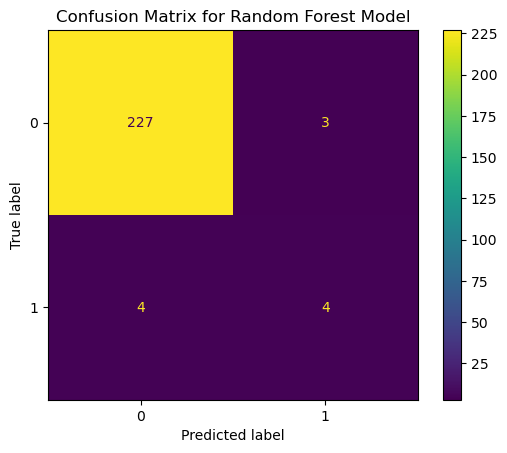

In [10]:
# rf = grid_search.best_estimator_
# y_pred = rf.predict(X_test)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

# Print classification report
print(classification_report(y_test, y_pred))

# Show a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


[0.         0.00990099 0.01980198 0.02970297 0.03960396 0.04950495
 0.05940594 0.06930693 0.07920792 0.08910891 0.0990099  0.10891089
 0.11881188 0.12871287 0.13861386 0.14851485 0.15841584 0.16831683
 0.17821782 0.18811881 0.1980198  0.20792079 0.21782178 0.22772277
 0.23762376 0.24752475 0.25742574 0.27722772 0.28712871 0.2970297
 0.32673267 0.38613861 0.3960396  0.40594059 0.41584158 0.43564356
 0.46534653 0.47524752 0.48514851 0.4950495  0.5049505  0.53465347
 0.54455446 0.55445545 0.58415842 0.59405941 0.61386139 0.69306931
 0.74257426 0.82178218 0.88118812 0.89108911 0.91089109]


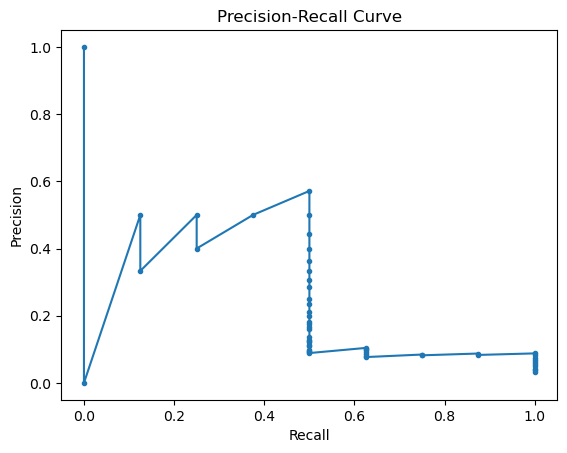

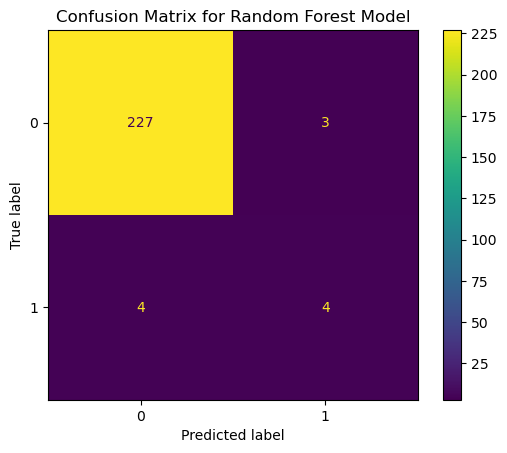

Optimal Threshold: 0.9108910891089109


/tmp/ipykernel_180620/1287177153.py:23: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [11]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

print(thresholds)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# Find the optimal threshold (example: maximizing F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print('Optimal Threshold:', optimal_threshold)